In [8]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [18]:
# Load the data
data = pd.read_excel("bankruptcy-prevention.xlsx") 

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   industrial_risk        250 non-null    float64
 1   management_risk        250 non-null    float64
 2   financial_flexibility  250 non-null    float64
 3   credibility            250 non-null    float64
 4   competitiveness        250 non-null    float64
 5   operating_risk         250 non-null    float64
 6   class                  250 non-null    object 
dtypes: float64(6), object(1)
memory usage: 13.8+ KB


In [20]:
data.describe()

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk
count,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000
mean,0.518000,0.614000,0.376000,0.470000,0.476000,0.570000
std,0.411526,0.410705,0.401583,0.415682,0.440682,0.434575
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000
75%,1.000000,1.000000,0.500000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [21]:
data.isnull().sum()

industrial_risk          0
management_risk          0
financial_flexibility    0
credibility              0
competitiveness          0
operating_risk           0
class                    0
dtype: int64

In [24]:
LE = LabelEncoder()
data.iloc[:,-1] = LE.fit_transform(data.iloc[:,-1])

In [51]:
data.corr()

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
industrial_risk,1.000000,0.255127,-0.162624,-0.014438,-0.257814,0.144507,-0.227823
management_risk,0.255127,1.000000,-0.254845,-0.303341,-0.306568,0.213874,-0.370838
financial_flexibility,-0.162624,-0.254845,1.000000,0.524951,0.686612,-0.116903,0.751020
credibility,-0.014438,-0.303341,0.524951,1.000000,0.675689,-0.288458,0.755909
competitiveness,-0.257814,-0.306568,0.686612,0.675689,1.000000,-0.211383,0.899452
operating_risk,0.144507,0.213874,-0.116903,-0.288458,-0.211383,1.000000,-0.279786
class,-0.227823,-0.370838,0.751020,0.755909,0.899452,-0.279786,1.000000


c:\Users\Administrator\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Administrator\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Administrator\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Administrator\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert in

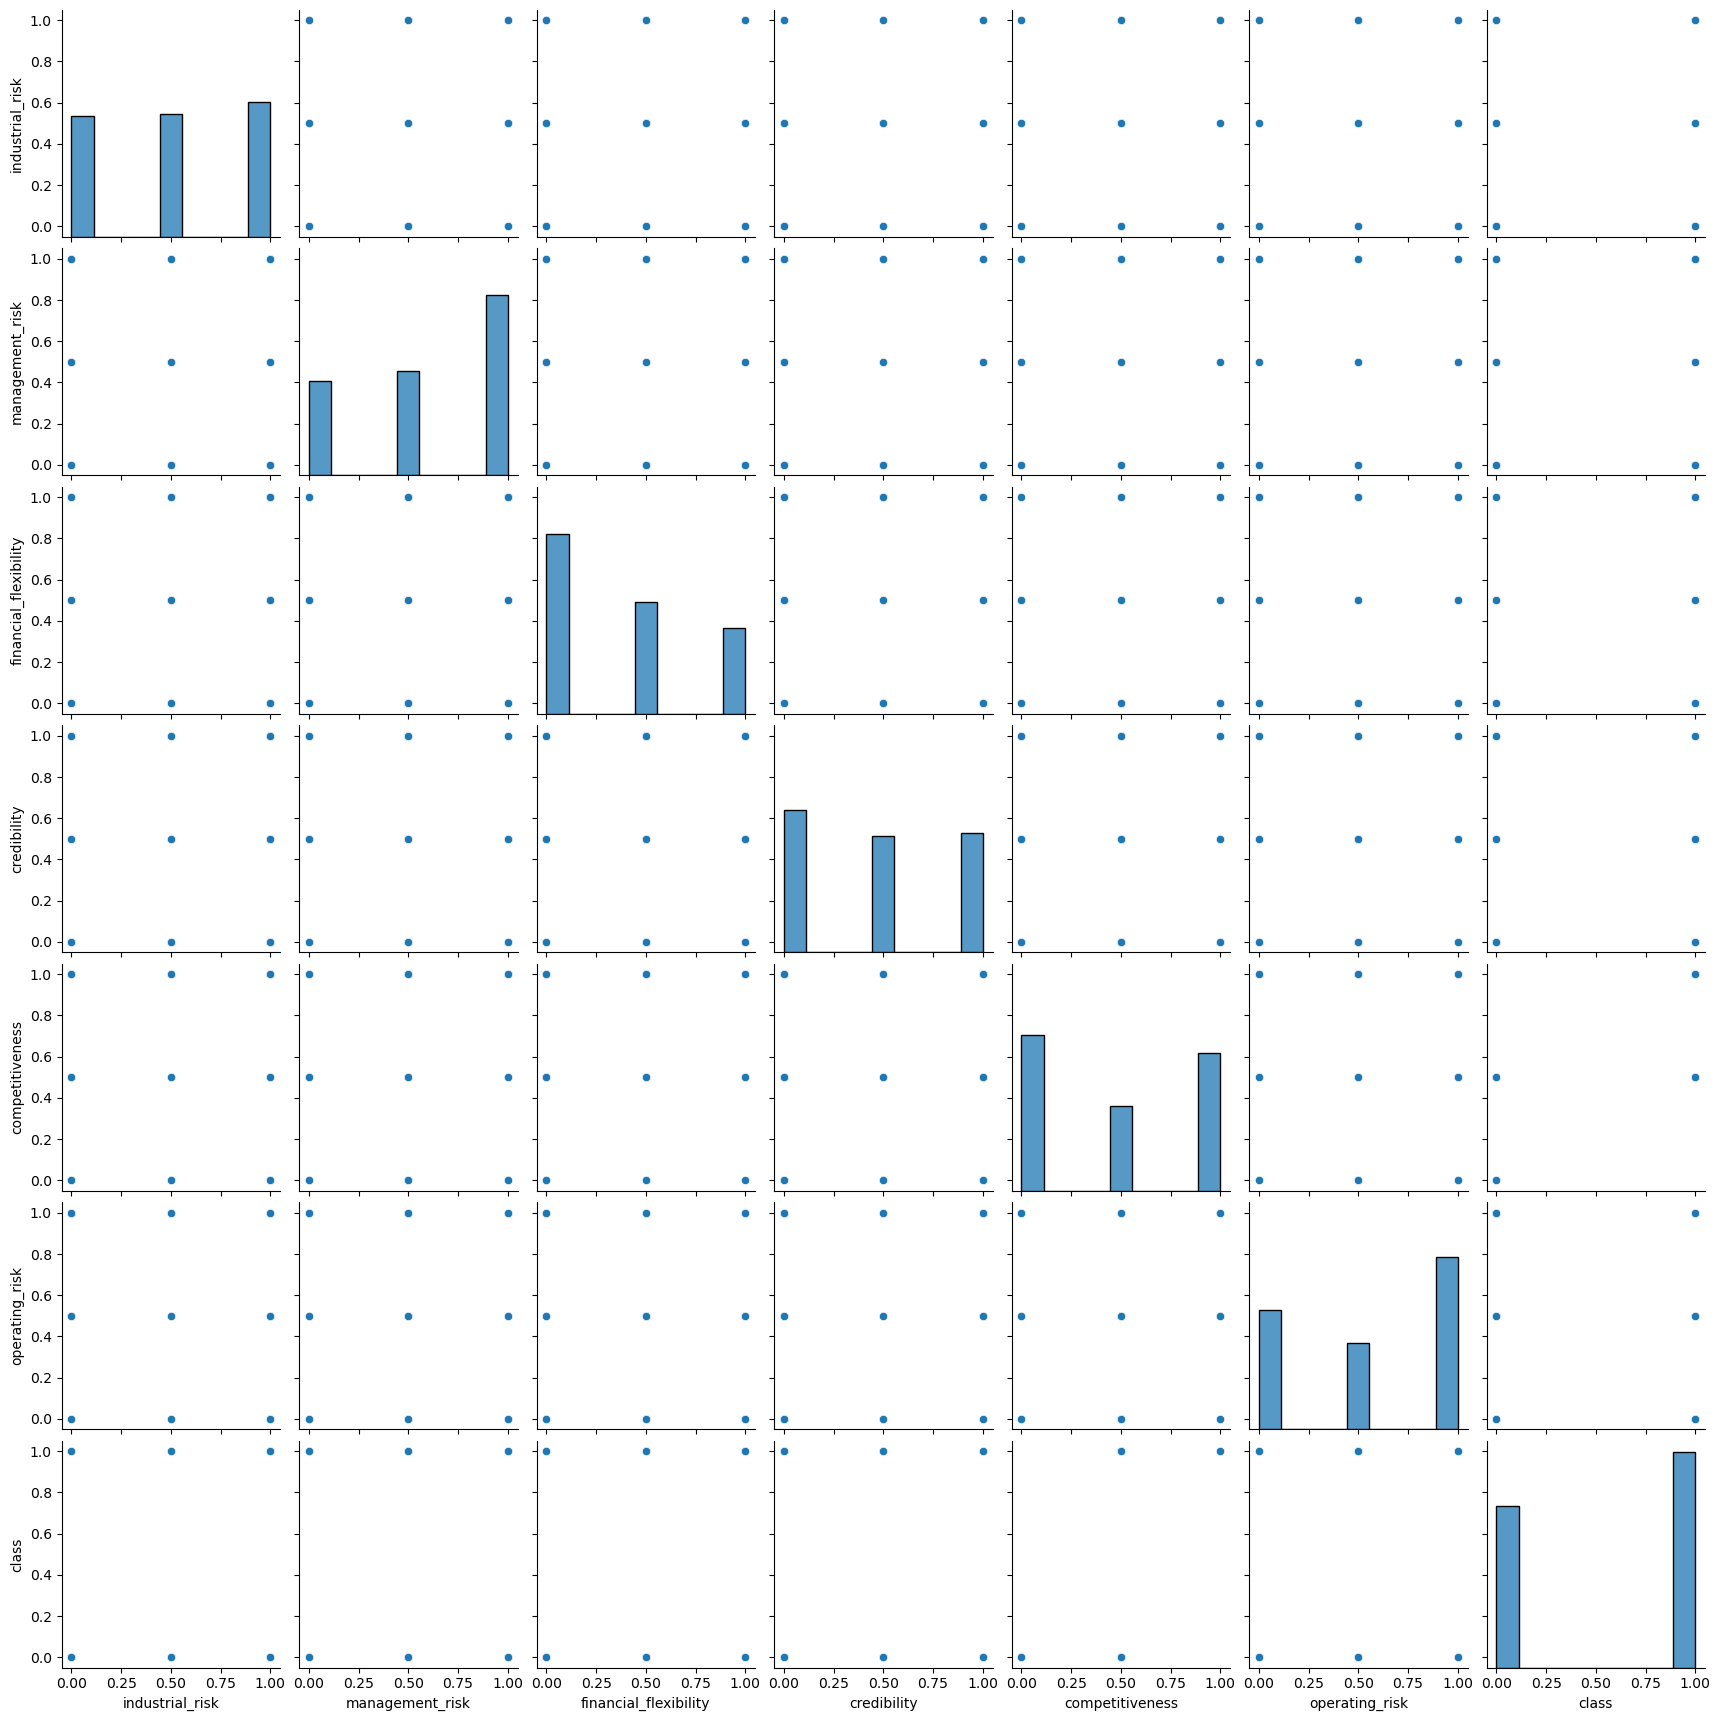

In [52]:
# Data exploration
sns.pairplot(data) 

<Axes: >

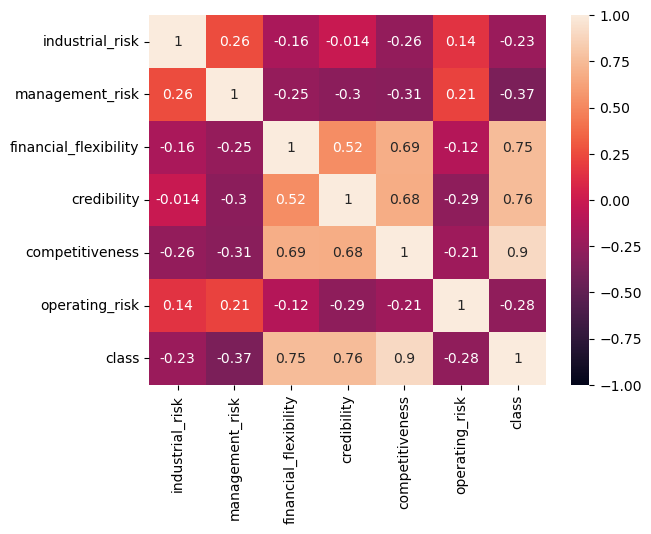

In [53]:
sns.heatmap(data.corr(), vmin = -1, vmax = 1, annot = True)

Creating a Count Plot for Target Variable

<Axes: xlabel='class', ylabel='count'>

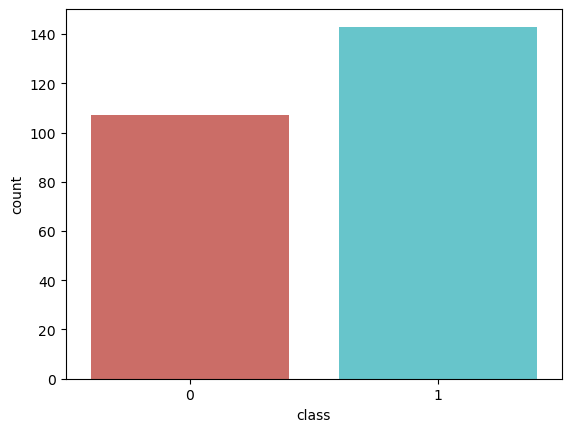

In [55]:
sns.countplot(x = 'class', data = data, palette = 'hls')

Creating a Count Plot for financial_flexibility Variable

<Axes: xlabel='financial_flexibility', ylabel='count'>

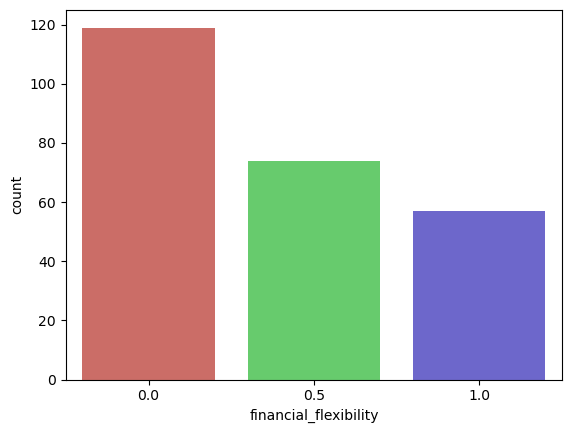

In [56]:
sns.countplot(x = 'financial_flexibility', data = data, palette = 'hls')

Creating Cross Tab using Bar-plot

<Axes: xlabel='class'>

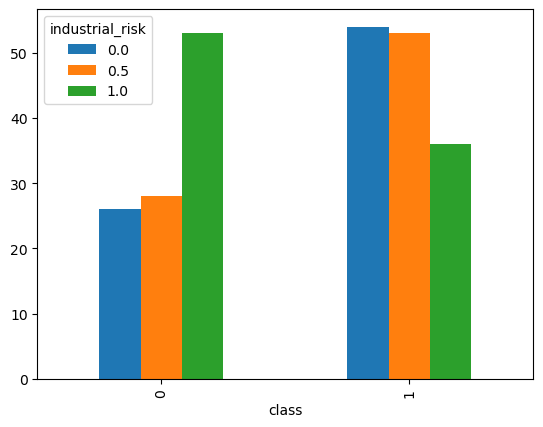

In [57]:
pd.crosstab(data['class'], data['industrial_risk']).plot(kind = 'bar')

<Axes: xlabel='class'>

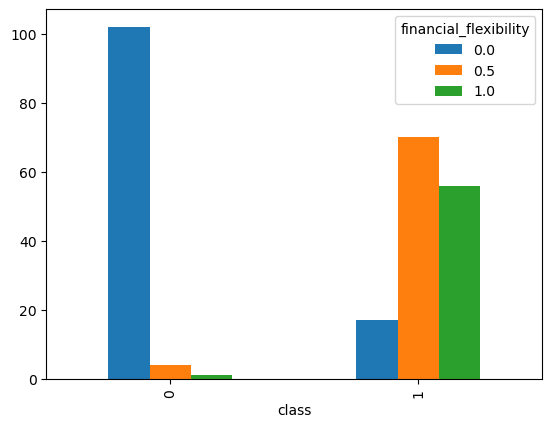

In [58]:
pd.crosstab(data['class'],data['financial_flexibility']).plot(kind = 'bar')

<Axes: xlabel='class'>

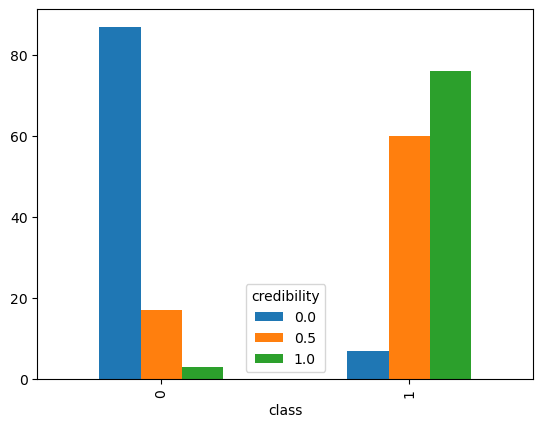

In [59]:
pd.crosstab(data['class'], data['credibility']).plot(kind = 'bar')

<Axes: xlabel='financial_flexibility'>

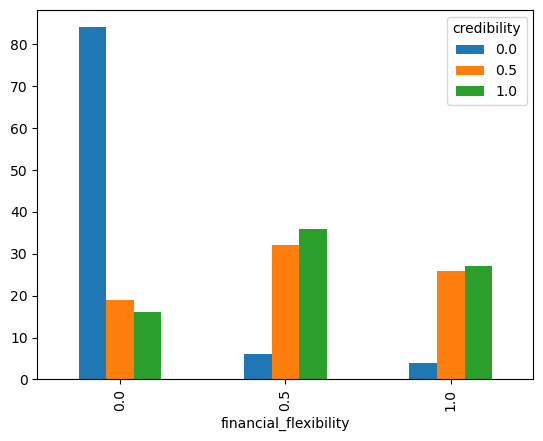

In [60]:
pd.crosstab(data['financial_flexibility'],data['credibility']).plot(kind = 'bar')

Model Building

Shuffling the combined data which helps in building the model in better way

sample(frac=1) shuffles all the rows in the DataFrame.


In [61]:
# Shuffle the combined data
data = data.sample(frac=1, random_state=42).reset_index(drop=True)

# Display the first few rows of the shuffled data
print(data.head())

   industrial_risk  management_risk  financial_flexibility  credibility  \
0              0.0              1.0                    1.0          1.0   
1              1.0              1.0                    0.0          0.0   
2              1.0              1.0                    0.0          0.5   
3              0.0              1.0                    0.0          0.0   
4              0.5              0.5                    1.0          1.0   

   competitiveness  operating_risk class  
0              0.5             1.0     1  
1              0.0             0.0     0  
2              0.0             0.5     0  
3              0.0             0.0     0  
4              1.0             0.5     1  


In [62]:
data.shape

(250, 7)

Prepering the Data

In [63]:
# Splitting data into features and target
X = data.drop(columns=['class']) 
y = data['class']

In [64]:
# Train-Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [67]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_curve, roc_auc_score

In [69]:
# Standardize the features 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [70]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [71]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [72]:
# Initialize models
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boost': GradientBoostingClassifier(),
    'SVM': SVC(),
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier()
}

In [73]:
# Check the unique values in the target variable (y_train)
print("Unique values in target variable (y_train):", np.unique(y_train))

# If the target is not already categorical or binary, convert it
# Example: Converting continuous target into discrete binary classes (assuming 0 = non-bankruptcy, 1 = bankruptcy)
if y_train.dtype in ['float64', 'int64'] and len(np.unique(y_train)) > 2:
    # Assuming a threshold to classify continuous target into two categories
    threshold = 0.5  # Example: Convert values above 0.5 to 1 (bankruptcy), below to 0 (non-bankruptcy)
    y_train = (y_train > threshold).astype(int)
    y_test = (y_test > threshold).astype(int)

# Re-check the unique values to confirm the changes
print("Unique values after conversion (y_train):", np.unique(y_train))


Unique values in target variable (y_train): [0 1]
Unique values after conversion (y_train): [0 1]


In [74]:
from sklearn.preprocessing import LabelEncoder

# Initialize label encoder
label_encoder = LabelEncoder()

# Convert target variable to numeric format
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)


In [75]:
# Now fit the model (e.g., Random Forest or Logistic Regression)
model = RandomForestClassifier()
model.fit(X_train_scaled, y_train)

# Predict and evaluate
y_pred = model.predict(X_test_scaled)


In [77]:
# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {accuracy:.4f}")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print("-" * 50)

Logistic Regression Accuracy: 0.9800
[[20  1]
 [ 0 29]]
              precision    recall  f1-score   support

           0       1.00      0.95      0.98        21
           1       0.97      1.00      0.98        29

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50

--------------------------------------------------
Random Forest Accuracy: 1.0000
[[21  0]
 [ 0 29]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       1.00      1.00      1.00        29

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50

--------------------------------------------------
Gradient Boost Accuracy: 0.9800
[[21  0]
 [ 1 28]]
              precision    recall  f1-score   support

           0       0.95      1.0

In [78]:
from sklearn.metrics import roc_auc_score, f1_score

# Evaluate with ROC AUC score and F1 score
for name, model in models.items():
    y_pred_proba = model.predict_proba(X_test_scaled)[:, 1] if hasattr(model, 'predict_proba') else None
    y_pred = model.predict(X_test_scaled)
    
    if y_pred_proba is not None:
        roc_auc = roc_auc_score(y_test, y_pred_proba)
        print(f"{name} ROC AUC: {roc_auc:.4f}")
    
    f1 = f1_score(y_test, y_pred)
    print(f"{name} F1 Score: {f1:.4f}")
    print("-" * 50)


Logistic Regression ROC AUC: 0.9984
Logistic Regression F1 Score: 0.9831
--------------------------------------------------
Random Forest ROC AUC: 1.0000
Random Forest F1 Score: 1.0000
--------------------------------------------------
Gradient Boost ROC AUC: 0.9992
Gradient Boost F1 Score: 0.9825
--------------------------------------------------
SVM F1 Score: 0.9831
--------------------------------------------------
KNN ROC AUC: 0.9754
KNN F1 Score: 0.9831
--------------------------------------------------
Decision Tree ROC AUC: 0.9828
Decision Tree F1 Score: 0.9825
--------------------------------------------------


In [79]:
from sklearn.model_selection import GridSearchCV

In [80]:
from sklearn.model_selection import GridSearchCV

# Example for Random Forest hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

# Best parameters and accuracy
print("Best Parameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)


Best Parameters:  {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 50}
Best Score:  1.0


In [81]:
import joblib

# Save the best model and scaler for deployment
joblib.dump(grid_search.best_estimator_, 'best_model.pkl')
joblib.dump(scaler, 'scaler.pkl')


['scaler.pkl']